In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
# Replace the file path with your dataset's path
# Example: "path/to/your/StudentsPerformance.csv"
data = pd.read_csv("D:\Creator\StudentsPerformance.csv")
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


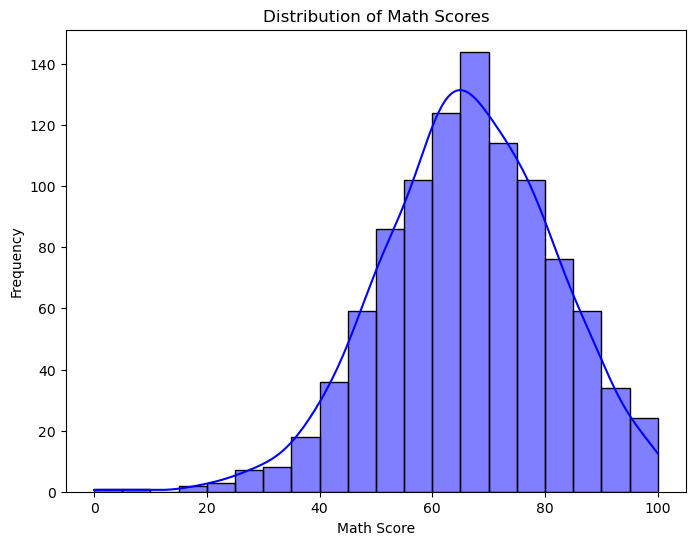

In [3]:
#Histogram plot
def plot_histogram(data):
    plt.figure(figsize=(8, 6))
    sns.histplot(data['math score'], bins=20, kde=True, color='blue')
    plt.title('Distribution of Math Scores')
    plt.xlabel('Math Score')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(data)

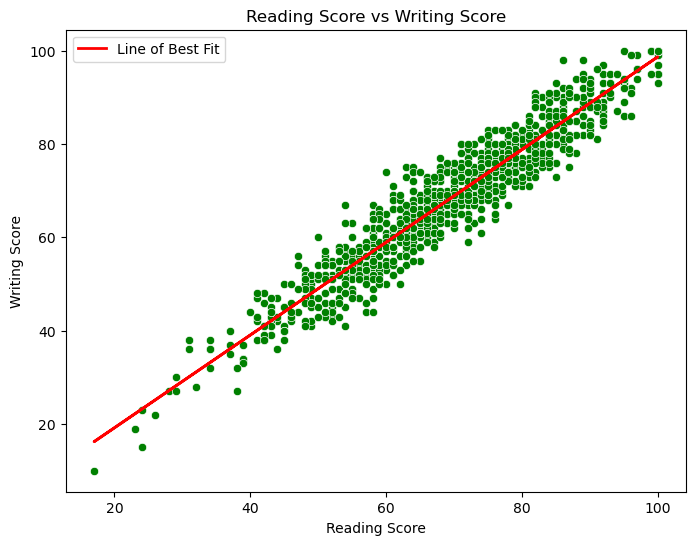

In [4]:
def plot_scatter_with_line(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='reading score', y='writing score', data=data, color='green', edgecolor='w')
    
    # Fit a line
    x = data['reading score'].values.reshape(-1, 1)
    y = data['writing score'].values
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    plt.plot(data['reading score'], y_pred, color='red', linewidth=2, label='Line of Best Fit')
    plt.title('Reading Score vs Writing Score')
    plt.xlabel('Reading Score')
    plt.ylabel('Writing Score')
    plt.legend()
    plt.show()

plot_scatter_with_line(data)

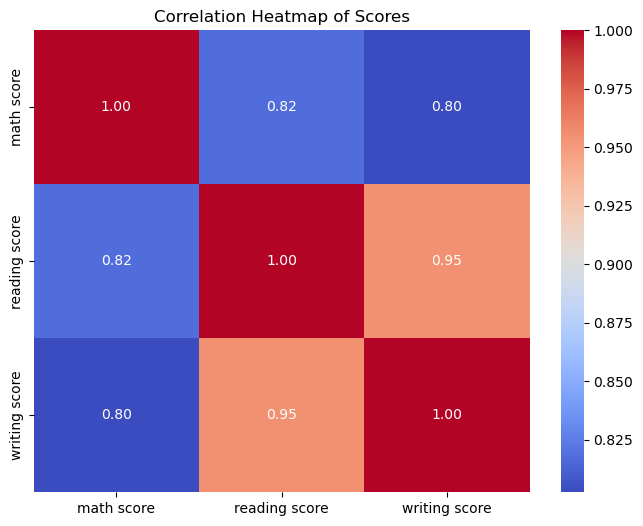

In [5]:
# Plot 3: Heatmap for correlations between scores
def plot_heatmap(data):
    plt.figure(figsize=(8, 6))
    score_data = data[['math score', 'reading score', 'writing score']]
    correlation_matrix = score_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Scores')
    plt.show()

plot_heatmap(data)

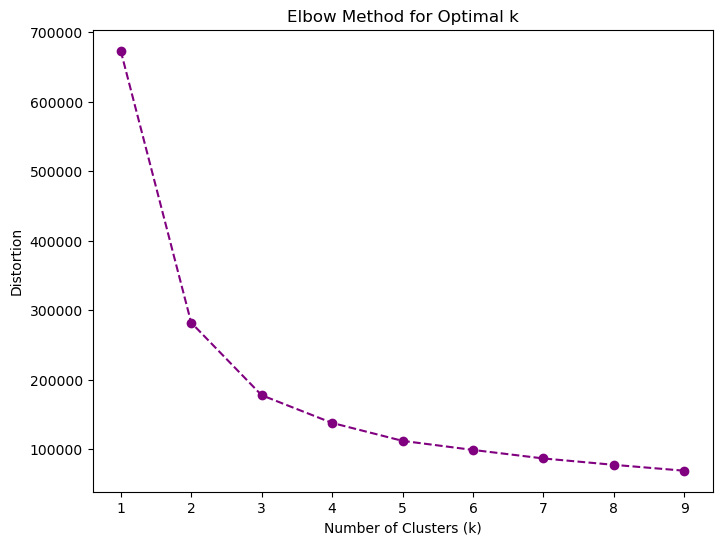

In [7]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace 4 with your actual number of physical cores

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Plot 4: Elbow plot for k-means clustering
def plot_elbow(data):
    scores = data[['math score', 'reading score', 'writing score']].values
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
        kmeans.fit(scores)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, marker='o', linestyle='--', color='purple')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.show()

# Call the function with your dataset
plot_elbow(data)
